# Names in Boxes

From: https://math.dartmouth.edu/~pw/solutions.pdf 

The names of 100 prisoners are placed in 100 wooden boxes, one name to a box, and the boxes are
lined up on a table in a room. One by one, the prisoners are led into the room; each may look
in at most 50 boxes, but must leave the room exactly as he found it and is permitted no further
communication with the others.
The prisoners have a chance to plot their strategy in advance, and they are going to need it,
because unless every single prisoner finds his own name all will subsequently be executed.
Find a strategy for them which which has probability of success exceeding 30%.
Comment: If each prisoner examines a random set of 50 boxes, their probability of survival
is an unenviable 1/2100  0.0000000000000000000000000000008. They could do worse—if they all
look in the same 50 boxes, their chances drop to zero. 30% seems ridiculously out of reach—but
yes, you heard the problem correctly.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# %load_ext autoreload
# the "1" means: always reload modules marked with "%aimport"
# %autoreload 1

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import mpld3
import numpy as np
import pandas as pd
import os, sys
import warnings
from itertools import combinations, islice, takewhile
from numpy.random import randint, shuffle

In [129]:
def guess(golden_name, limiting_guesses, verbose=False):
    count = 0
    new_box_number = random_guess[golden_name]
    if verbose:
        print("Looking for:", golden_name)
    while (count <= limiting_guesses) and (boxes[new_box_number] != golden_name):
        count += 1
        new_box_number = random_guess[boxes[new_box_number]]
        if verbose:
            print("    guessed", golden_name, "in box", new_box_number, "found", boxes[new_box_number])
    if count > limiting_guesses:
        print("Failed!")
    elif boxes[new_box_number] == golden_name:
        if verbose:
            print("    Found it!", golden_name, "in box", new_box_number)
        return float(count)
    else:
        raise

## Setup

In [128]:
n_boxes = 10
n_prisoners = n_boxes
names = [''.join(x) for x in islice(combinations('abcdefghijklmnopqrstuvwxyz', 2), n_prisoners)]
positions = list(range(n_boxes))
shuffle(positions)
boxes = {box:name for box, name in zip(positions, names)}
guess_positions = list(range(n_boxes))
shuffle(guess_positions)
random_guess = {name:box for box, name in zip(guess_positions, names)}

In [134]:
counts = []
for name in names:
    counts.append(guess(name, n_boxes, verbose=True))

Looking for: ab
    guessed ab in box 0 found aj
    guessed ab in box 7 found ac
    guessed ab in box 2 found ag
    guessed ab in box 6 found ad
    guessed ab in box 1 found ak
    guessed ab in box 9 found ab
    Found it! ab in box 9
Looking for: ac
    guessed ac in box 6 found ad
    guessed ac in box 1 found ak
    guessed ac in box 9 found ab
    guessed ac in box 4 found ah
    guessed ac in box 0 found aj
    guessed ac in box 7 found ac
    Found it! ac in box 7
Looking for: ad
    guessed ad in box 9 found ab
    guessed ad in box 4 found ah
    guessed ad in box 0 found aj
    guessed ad in box 7 found ac
    guessed ad in box 2 found ag
    guessed ad in box 6 found ad
    Found it! ad in box 6
Looking for: ae
    guessed ae in box 3 found ae
    Found it! ae in box 3
Looking for: af
    Found it! af in box 5
Looking for: ag
    guessed ag in box 1 found ak
    guessed ag in box 9 found ab
    guessed ag in box 4 found ah
    guessed ag in box 0 found aj
    guessed ag 

In [131]:
np.average(counts), np.max(counts), len(counts)

(4.4000000000000004, 6.0, 10)

(array([ 1.,  2.,  0.,  0.,  0.,  0.,  7.,  0.,  0.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

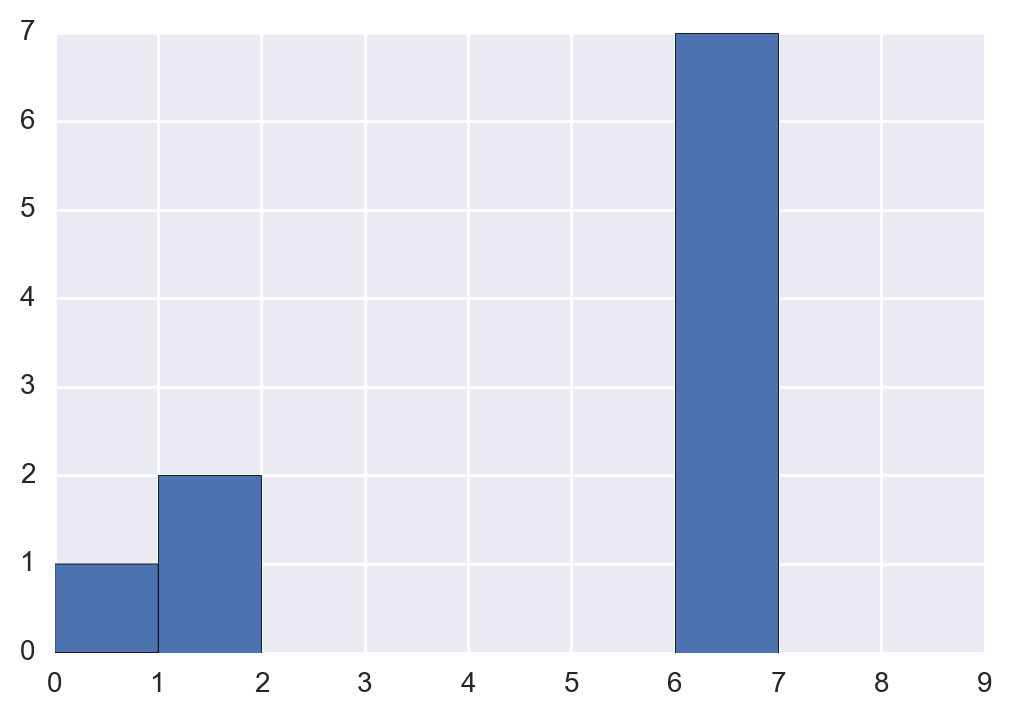

In [132]:
plt.hist(counts, bins=np.arange(0, n_boxes, 1))

In [135]:
n_boxes = 100
n_prisoners = n_boxes
names = [''.join(x) for x in islice(combinations('abcdefghijklmnopqrstuvwxyz', 2), n_prisoners)]
positions = list(range(n_boxes))
shuffle(positions)
boxes = {box:name for box, name in zip(positions, names)}
guess_positions = list(range(n_boxes))
shuffle(guess_positions)
random_guess = {name:box for box, name in zip(guess_positions, names)}

In [136]:
counts = []
for name in names:
    counts.append(guess(name, n_boxes/2, verbose=False))

In [137]:
np.average(counts), np.max(counts), len(counts)

(35.539999999999999, 50.0, 100)

(array([  0.,   2.,   0.,   4.,   0.,  12.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  31.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  51.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 

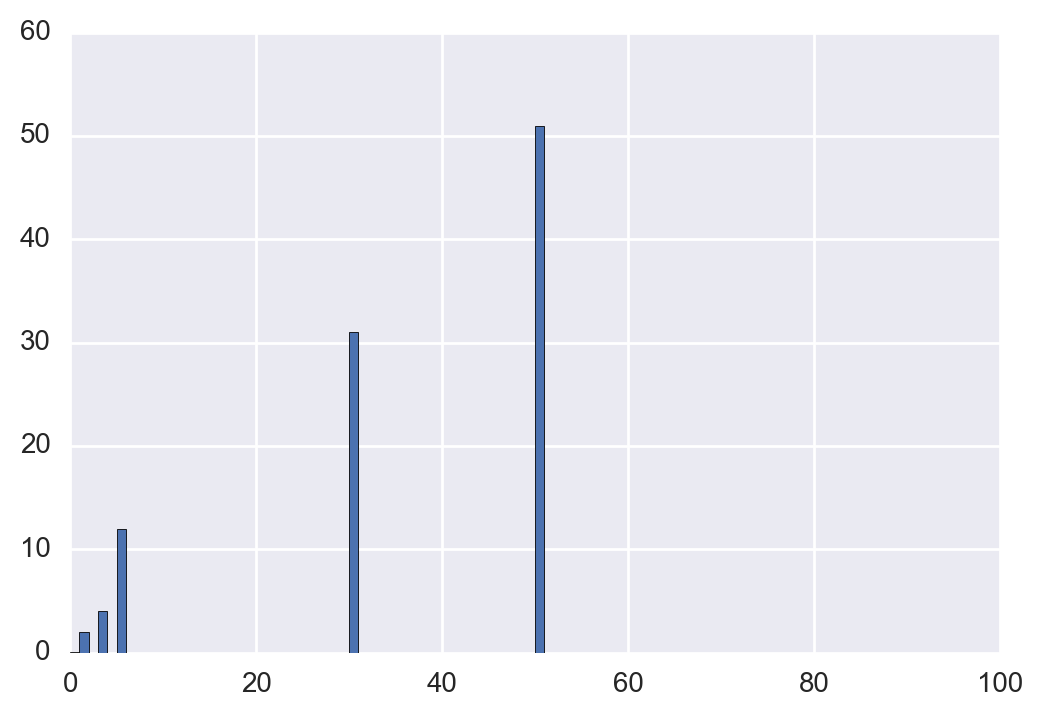

In [138]:
plt.hist(counts, bins=np.arange(0, n_boxes, 1))